In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from geneflow import GeneFlow
from geneflow.ops import RandomInputs, RandomMutations, UniformCrossover
from geneflow.selection import SelectFittest
from geneflow.fitness import SumGenes

Using cupy backend


In [3]:
NUM_EVOLUTIONS = 100
POPULATION_SIZE = 2048
GENE_SIZE = 128

In [4]:
# basic evolution graph
inputs = RandomInputs((POPULATION_SIZE, GENE_SIZE), max_value=1)
x = RandomMutations(max_gene_value=1)(inputs)
outputs = UniformCrossover()(x)

In [5]:
gf = GeneFlow(inputs, outputs, debug=0)
gf.summary()

OP (type)                                   Output Shape    Inputs
------------------------------------------  --------------  ----------------------
randominputs_25AE1A (RandomInputs)          (2048, 128)
randommutations_053097 (RandomMutations)    (2048, 128)     randominputs_25AE1A
uniformcrossover_C0D673 (UniformCrossover)  (2048, 128)     randommutations_053097


In [6]:
fitness_function = SumGenes(expected_max_value=GENE_SIZE)
evolution_strategy = SelectFittest()
gf.compile(evolution_strategy, fitness_function)

In [7]:
results = gf.evolve(num_evolutions=NUM_EVOLUTIONS)


In [8]:
results.display_populations(top_k=10, precision=0)

  fit score  genes
-----------  ---------------------------------------
          1  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
          1  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
          1  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
          1  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
          1  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
          1  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
          1  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
          1  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
          1  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
          1  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1


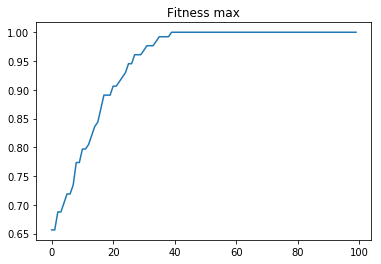

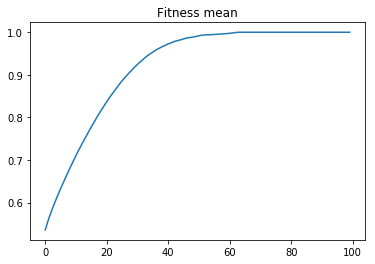

In [9]:
results.plot_metrics()